In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')


# Task 1: Data Exploration

In [ ]:
# Load the dataset into a Python environment
data = pd.read_csv('Loan sanction.csv')

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
#  Display the first few rows of the dataset to understand its structure
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data.shape

(367, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [10]:
# Check for missing values and handle them if necessary.
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical columns
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical columns
        data[col].fillna(data[col].median(), inplace=True)


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=[np.number]).columns


In [15]:
# Summary statistics
summary_stats = data[numerical_columns].describe().transpose()
summary_stats['median'] = data[numerical_columns].median()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                    count         mean          std   min     25%     50%  \
ApplicantIncome    367.0  4805.599455  4910.685399   0.0  2864.0  3786.0   
CoapplicantIncome  367.0  1569.577657  2334.232099   0.0     0.0  1025.0   
LoanAmount         367.0   135.980926    60.959739  28.0   101.0   125.0   
Loan_Amount_Term   367.0   342.822888    64.658402   6.0   360.0   360.0   
Credit_History     367.0     0.839237     0.367814   0.0     1.0     1.0   

                      75%      max  median  
ApplicantIncome    5060.0  72529.0  3786.0  
CoapplicantIncome  2430.5  24000.0  1025.0  
LoanAmount          157.5    550.0   125.0  
Loan_Amount_Term    360.0    480.0   360.0  
Credit_History        1.0      1.0     1.0  


# Task 2: Data Visualization

# 2.1 Univariate Analysis
 Explore the distribution of numeric columns using the following visualizations



<Figure size 1200x800 with 0 Axes>

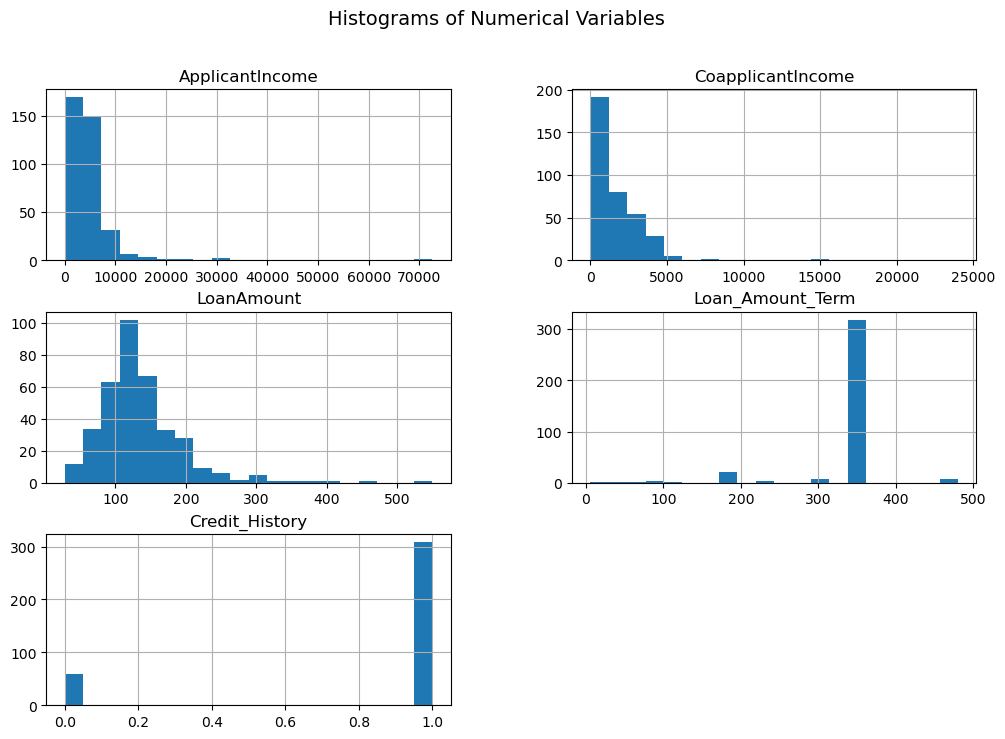

In [16]:
# Histograms
plt.figure(figsize=(12, 8))
data[numerical_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()

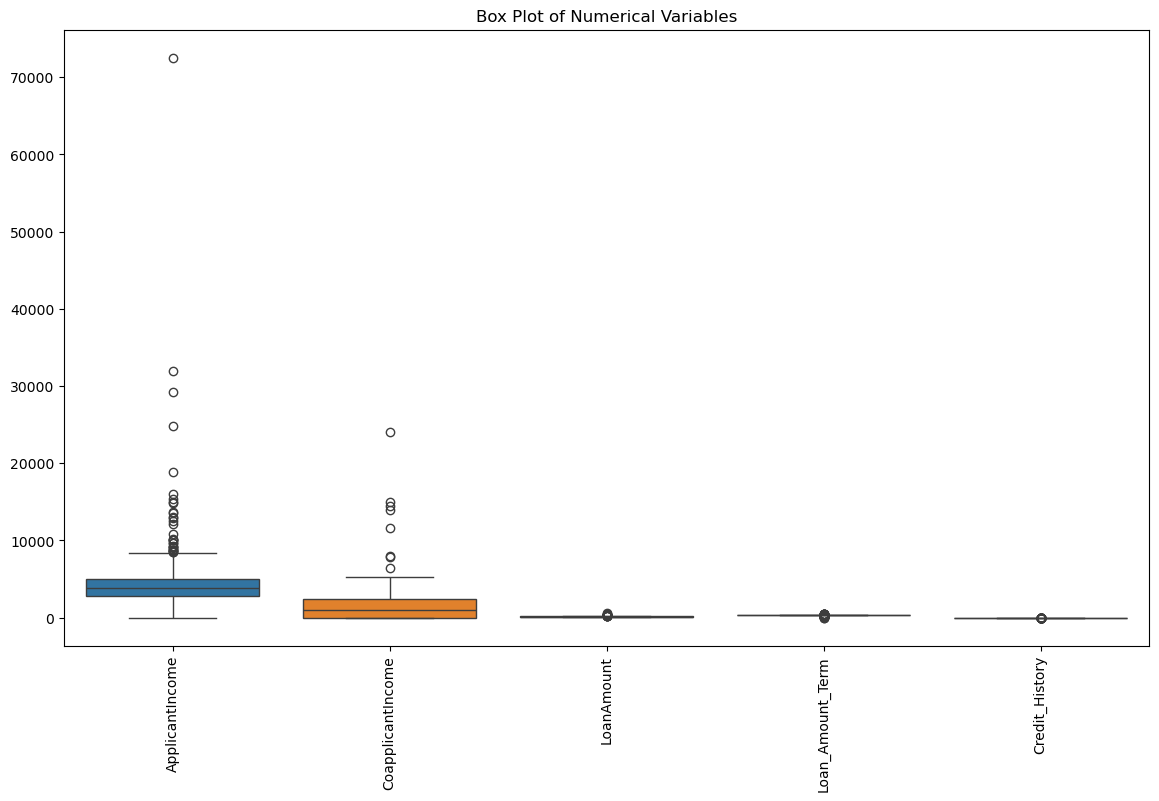

In [18]:
# Box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Variables")
plt.show()


In [19]:
#  Analyze categorical variables by creating the following


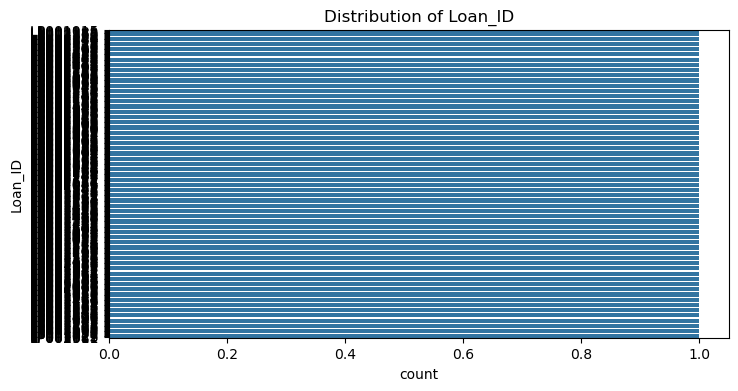

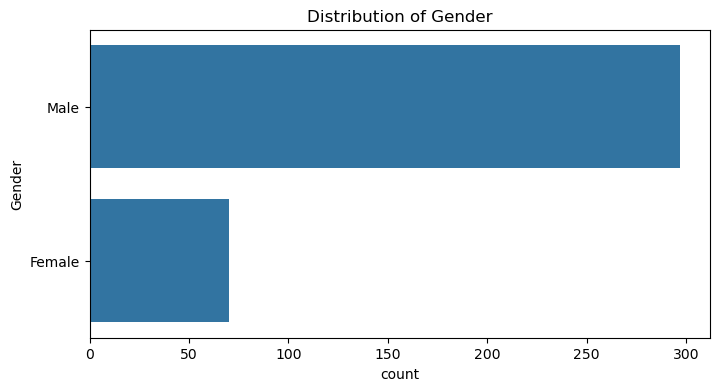

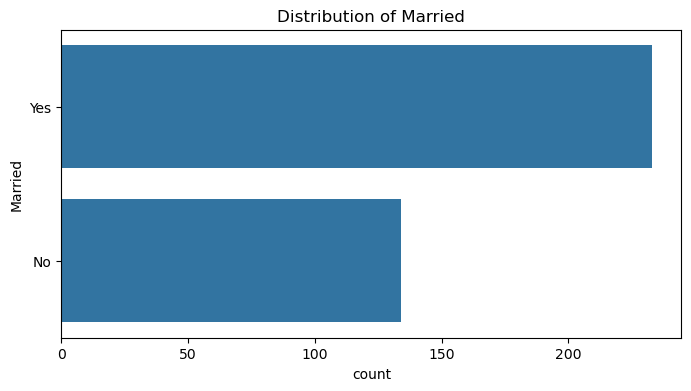

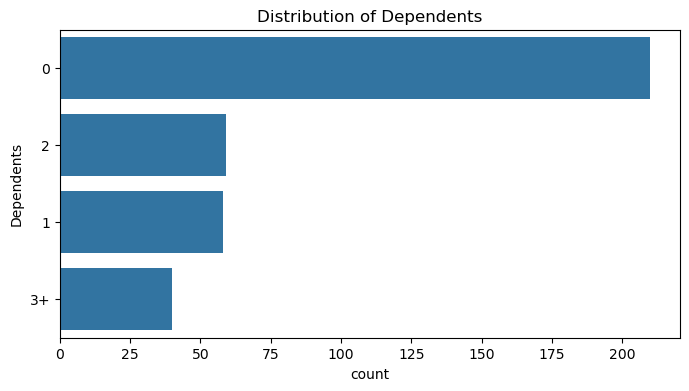

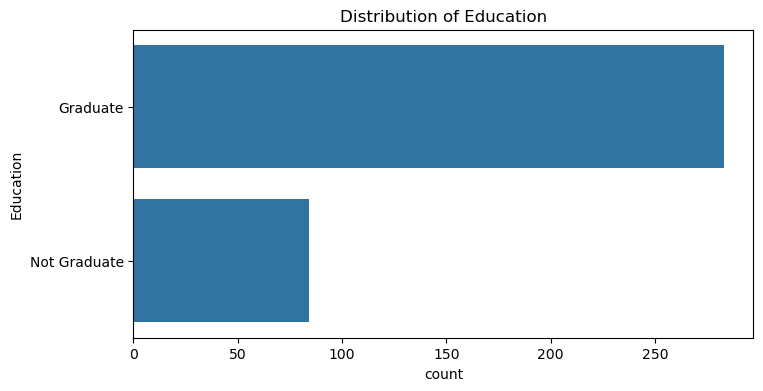

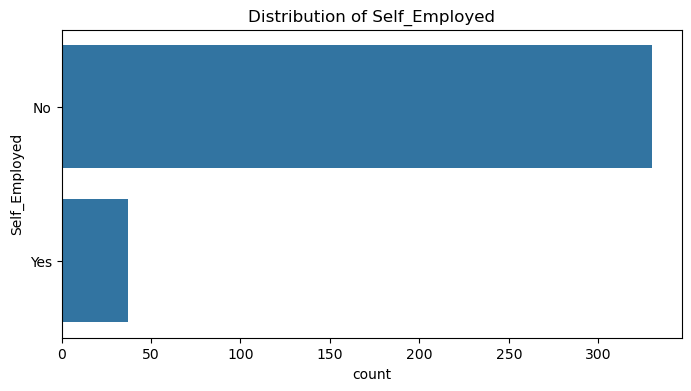

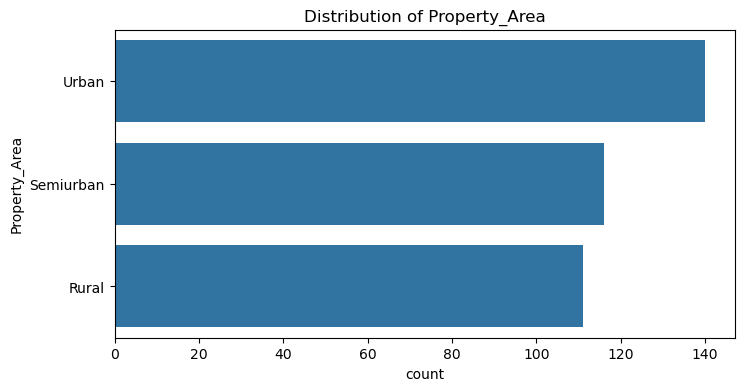

In [20]:
# Bar charts for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


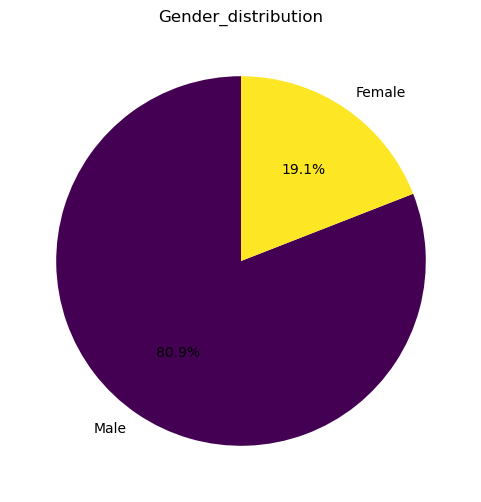

In [23]:
# Pie charts for categorical variables
plt.figure(figsize=(6, 6))
data["Gender"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Gender_distribution')
plt.ylabel('')
plt.show()

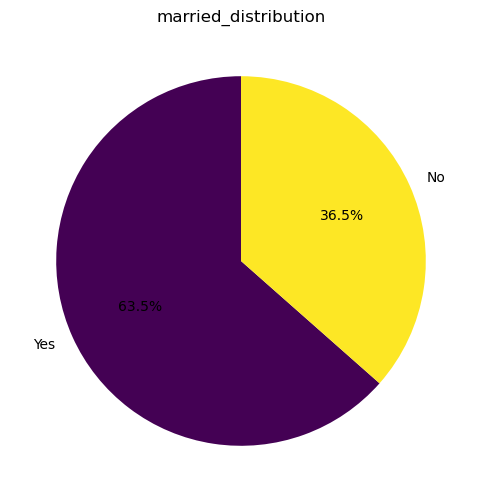

In [24]:
plt.figure(figsize=(6, 6))
data["Married"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('married_distribution')
plt.ylabel('')
plt.show()

# Key insights 
1.Income Distribution: Applicant Income and Co-applicant Income are right-skewed, meaning most applicants have lower incomes, but a few earn significantly more.
2. Loan Amount distribution is also right-skewed, indicating most loans are of smaller amounts with some high-value loans.
3. Outliers in Loan Amount: The boxplot of Loan Amount shows significant outliers, meaning some applicants have taken unusually large loans compared to others.
4. Loan Applicants by Education Level: More loan applicants are graduates than non-graduates.
5. Property Area Distribution: Most loan applicants come from Semi-Urban areas, followed by Urban and Rural areas.
6. Credit History Distribution: A majority of applicants have a good credit history (1), which increases their chances of loan approval.
7. Gender Distribution:Males dominate the loan applications, with a significantly higher proportion than females.

# 2.2 Bivariate Analysis

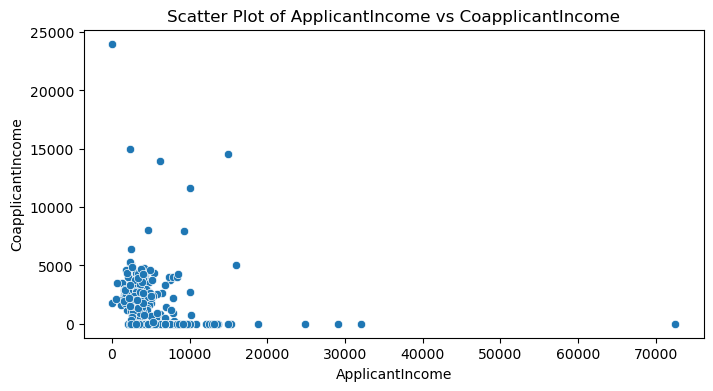

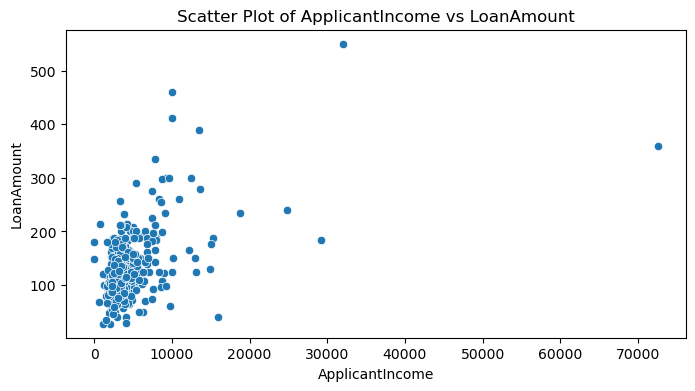

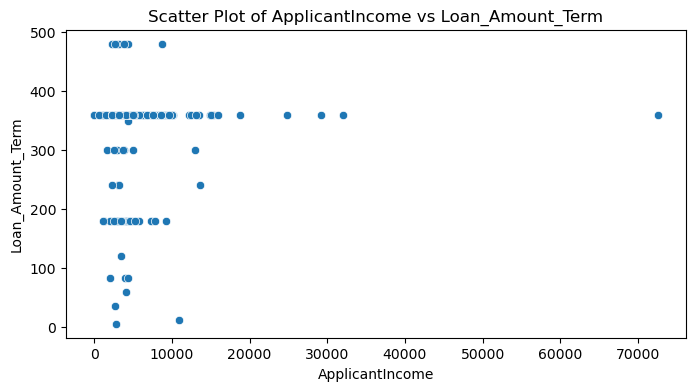

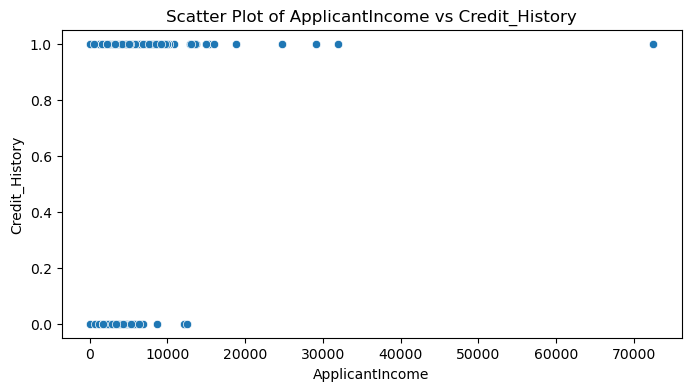

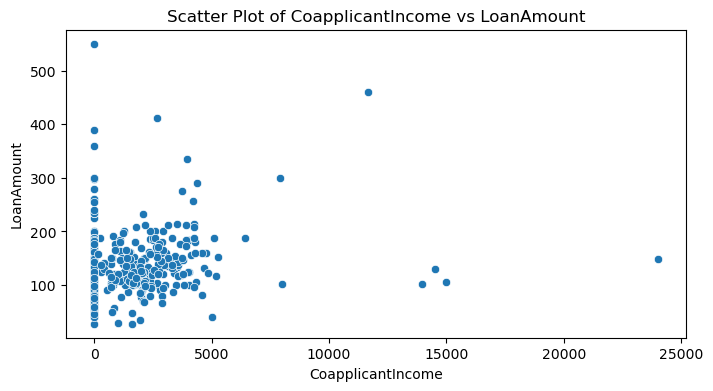

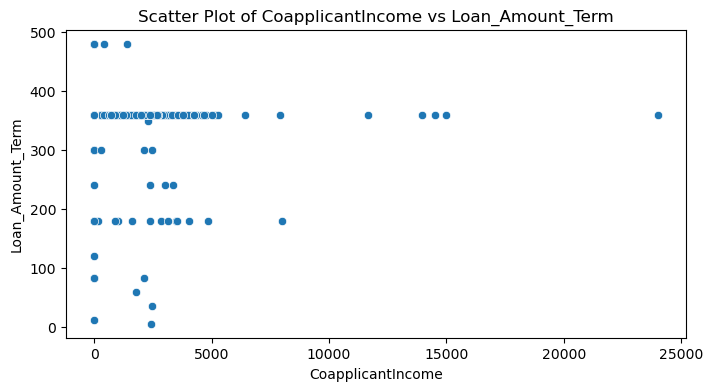

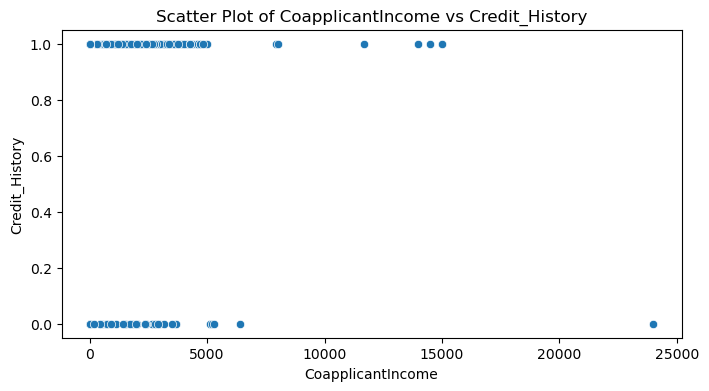

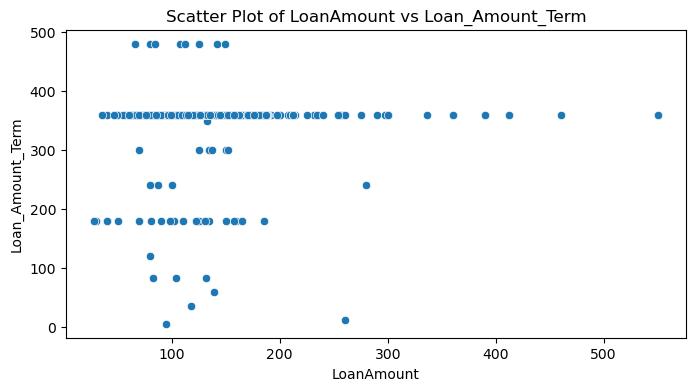

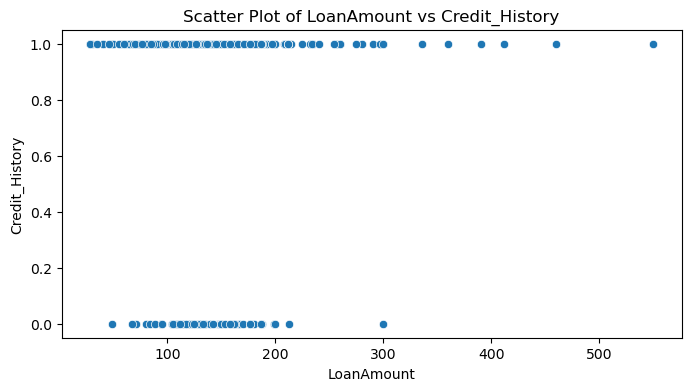

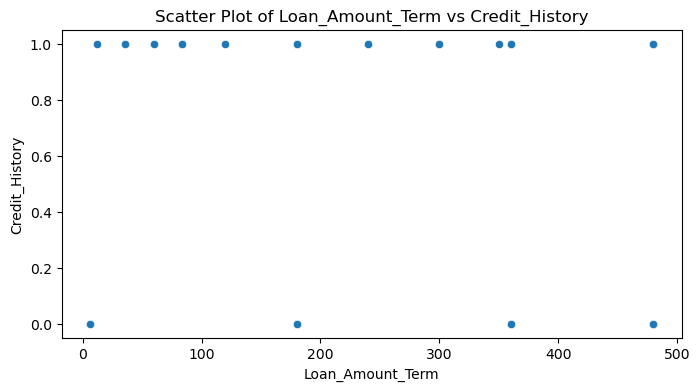

In [26]:
#  Create scatter plots to explore relationships between pairs of numeric variables.
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=data[numerical_columns[i]], y=data[numerical_columns[j]])
        plt.title(f"Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}")
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()


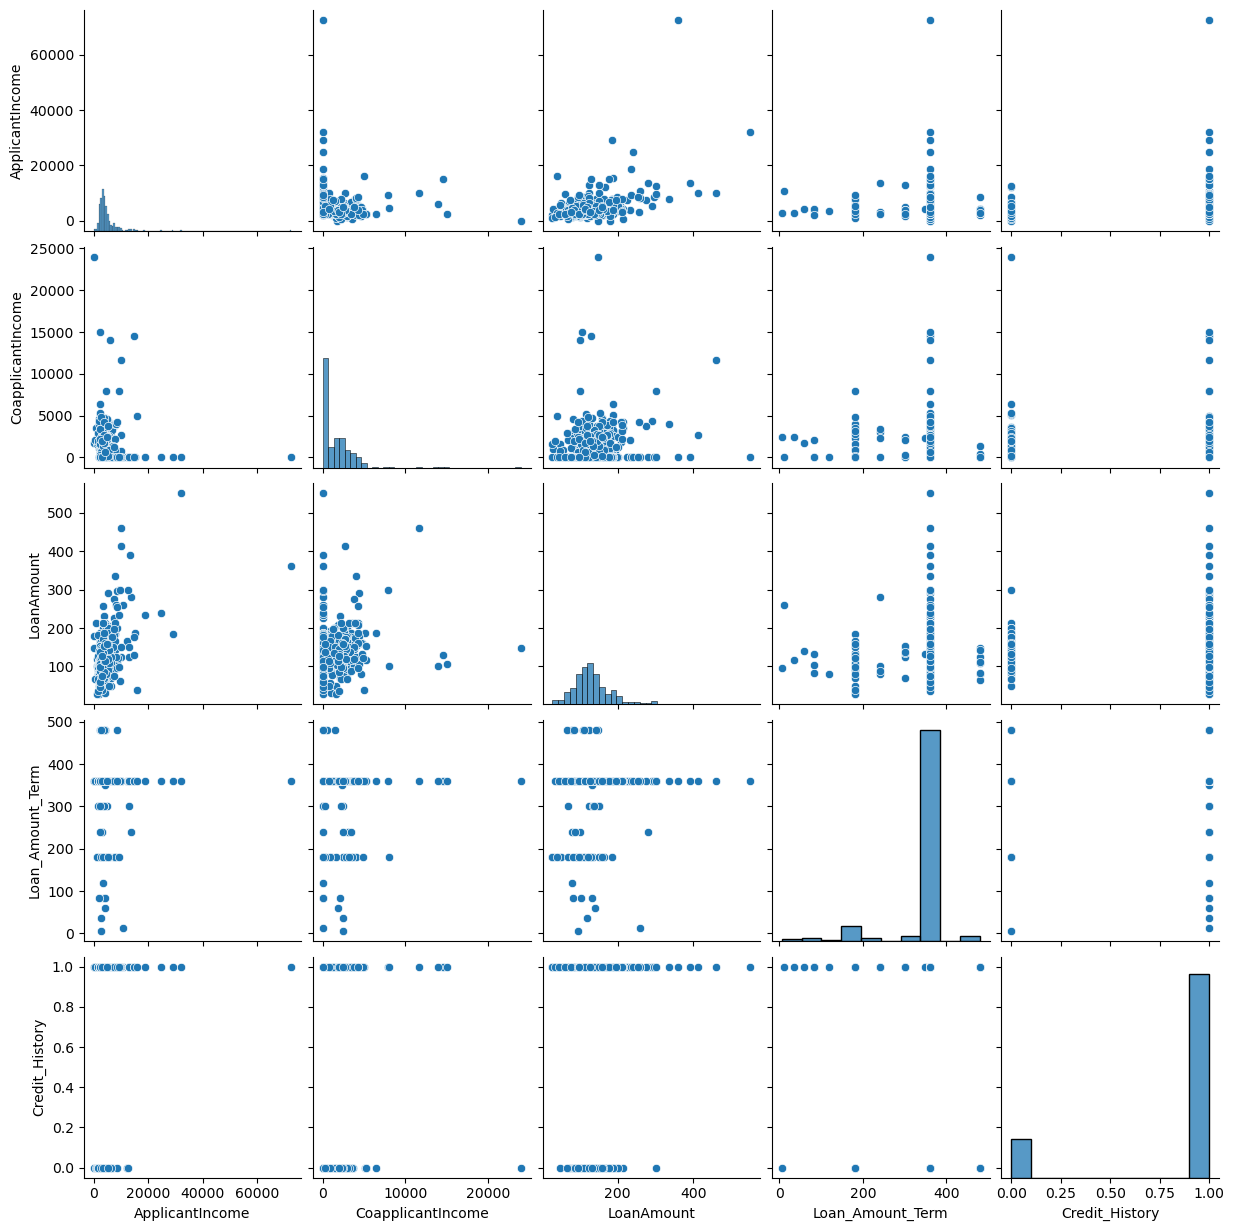

In [27]:
#  Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.

sns.pairplot(data[numerical_columns])
plt.show()


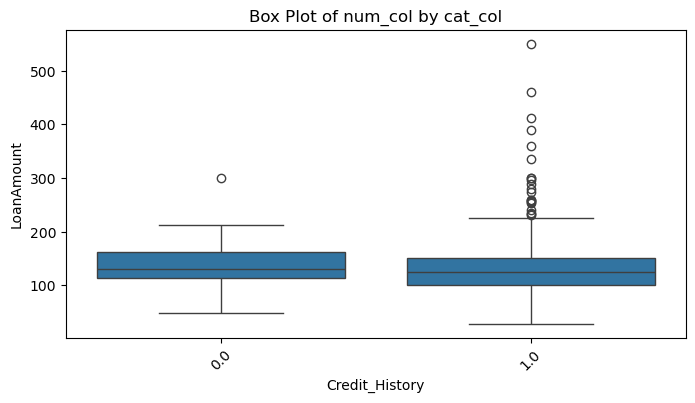

In [36]:
# Investigate the relationship between categorical and numeric variables using box plots or violin plots.

plt.figure(figsize=(8, 4))
sns.boxplot(x="Credit_History", y="LoanAmount",data=data)
plt.title("Box Plot of num_col by cat_col")
plt.xticks(rotation=45)
plt.show()
        
       

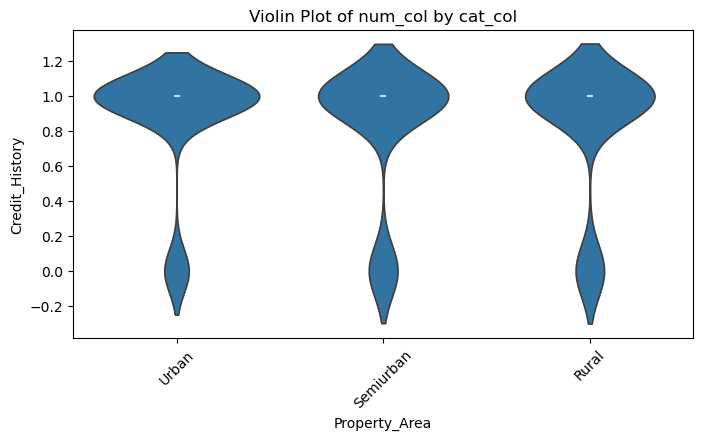

In [38]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=data[cat_col], y=data[num_col])
plt.title("Violin Plot of num_col by cat_col")
plt.xticks(rotation=45)
plt.show()

# 2.3 Multivariate Analysis

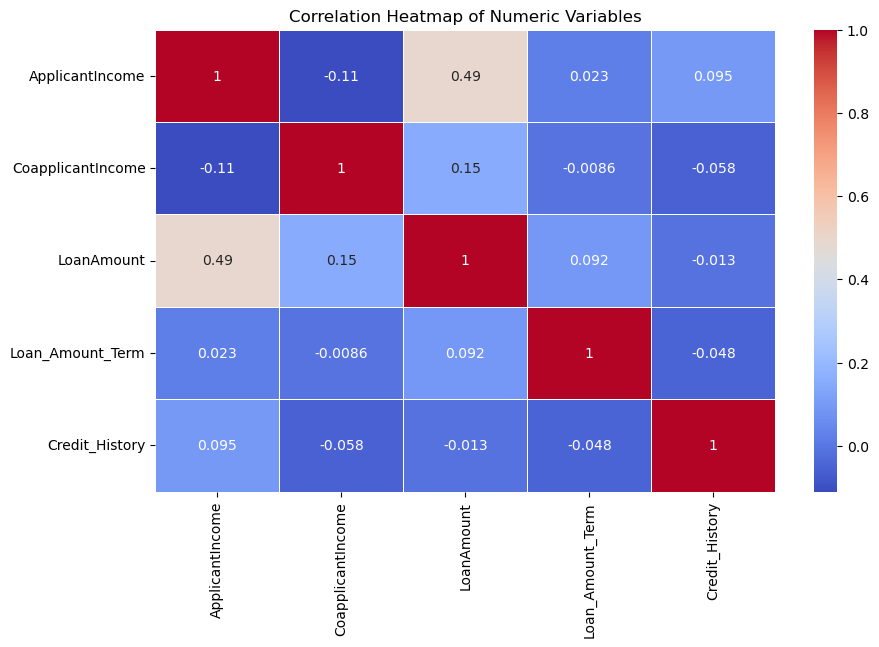

In [40]:
# Perform a correlation analysis to identify relationships between numeric variables. Visualize correlations using a heatmap.
plt.figure(figsize=(10, 6))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

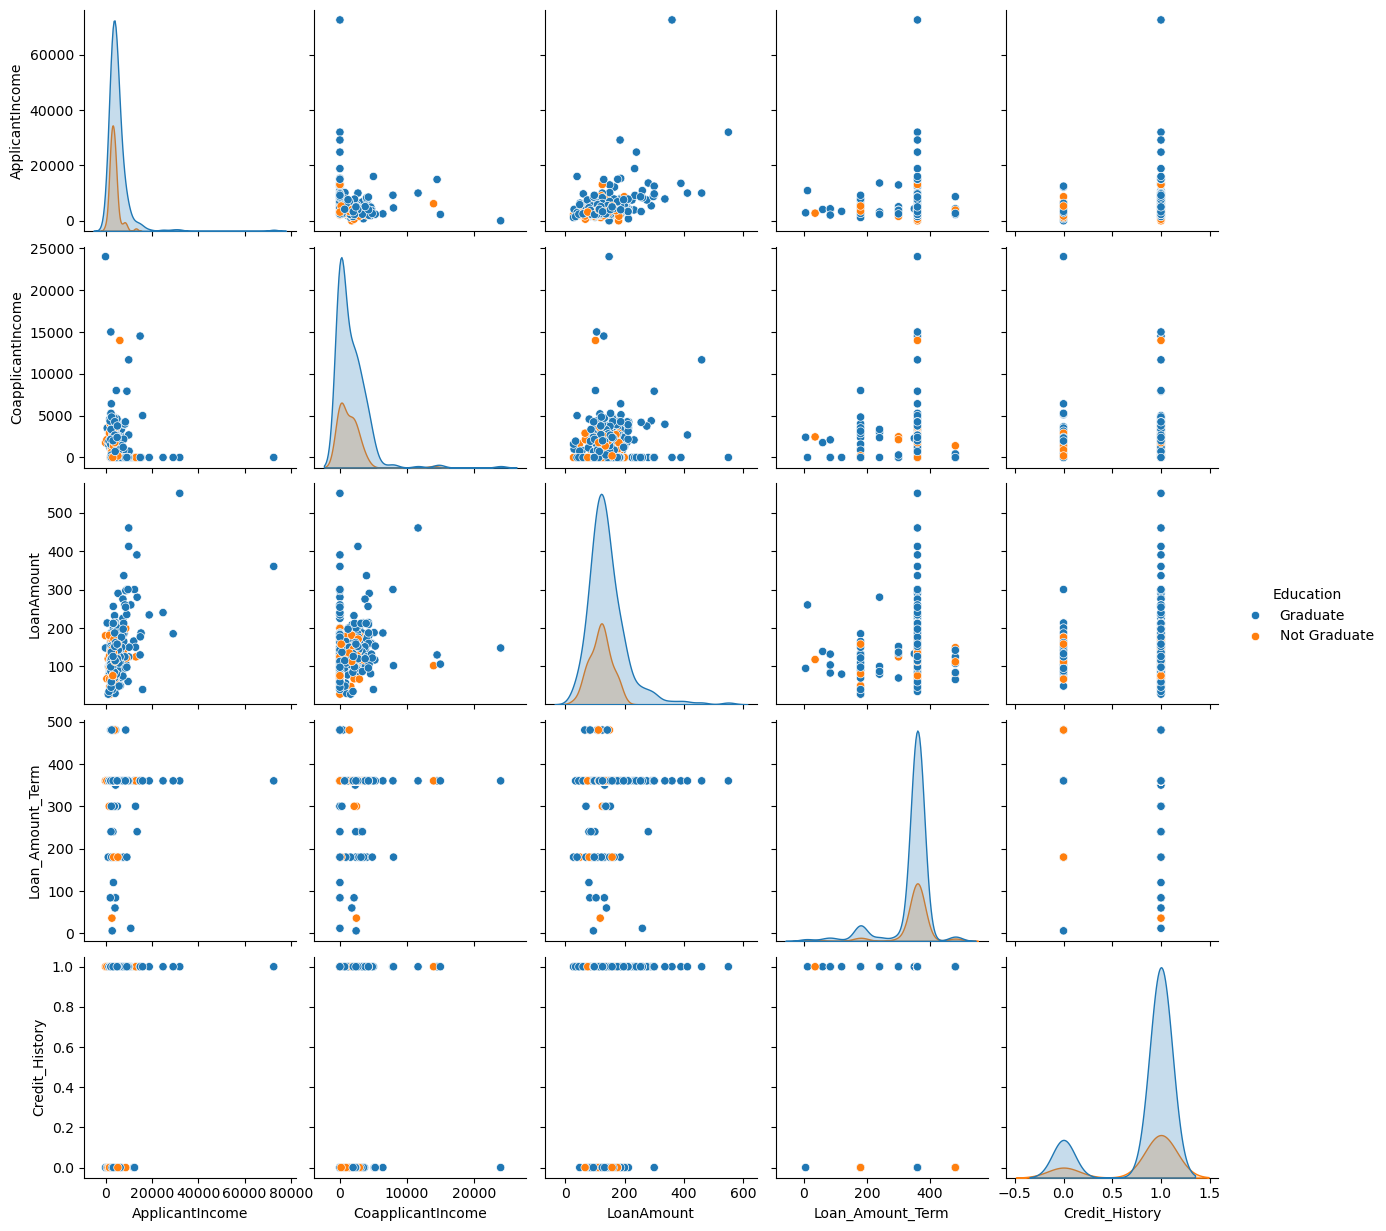

In [44]:
#-pair pllot for numeric variables
sns.pairplot(data,hue="Education")
plt.show()

# Multivariate Analysis
1. Correlation Heatmap:There is a weak positive correlation between Applicant Income and Loan Amount, meaning higher-income applicants tend to get slightly larger loans. Credit History shows a strong positive impact on loan approval.
2. Pair Plot Analysis:The scatter plots reveal a clear distinction in income levels and loan amounts based on education and credit history.


# Conclusion
1. Credit history is one of the most important factors in determining loan approval.
2. Higher applicant income generally leads to higher loan amounts, but there are exceptions.
3. Graduates tend to have better credit histories and receive more loan approvals.
4. Semi-urban areas have the highest number of applicants, possibly due to more favorable economic conditions.

# . Exploratory Data Analysis (EDA)
Univariate Analysis:

Histograms & KDE plots to show distributions of numerical features.
Box plots to detect outliers in income, loan amount, and term.
Pie charts & Bar charts to visualize the frequency of categorical features.

Bivariate Analysis:

Scatter plots to explore relationships between numeric variables.
Box & Violin plots to compare categorical vs. numerical variables.
Correlation heatmap to detect correlations between numerical features.

Multivariate Analysis:

Pair plots (scatter matrix) for interactions between multiple variables.
